In [1]:
# prompt: access shared drive files

# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

data_path = "data"

In [15]:
import pandas as pd

# Read the file
df = pd.read_csv(f'{data_path}/MAX86177_20230801_235809.ppg.csv', header=32)

# Print the first five rows
print(df.head())

              timestamp  sampleNum tagMEAS1_PPG1 tagMEAS1_PPG2 tagMEAS1_PPG3  \
0  1690927089895.778076        1.0           0_0           0_0           0_0   
1  1690927089903.555908        2.0           1_0           1_1           1_2   
2  1690927089911.333984        3.0           1_0           1_1           1_2   
3  1690927089919.111816        4.0           1_0           1_1           1_2   
4  1690927089926.889893        5.0           1_0           1_1           1_2   

  tagMEAS1_PPG4 tagMEAS2_PPG1 tagMEAS2_PPG2 tagMEAS2_PPG3 tagMEAS2_PPG4  ...  \
0           0_0           0_0           2_1           2_2           2_3  ...   
1           1_3           2_0           2_1           2_2           2_3  ...   
2           1_3           2_0           2_1           2_2           2_3  ...   
3           1_3           2_0           2_1           2_2           2_3  ...   
4           1_3           2_0           2_1           2_2           2_3  ...   

     ACCX    ACCY    ACCZ  temperature

The CSV file has various parameters, the most important for PPG analysis is to take one of the PPG data streams, for example MEAS1_PPG1, an analze that signal.

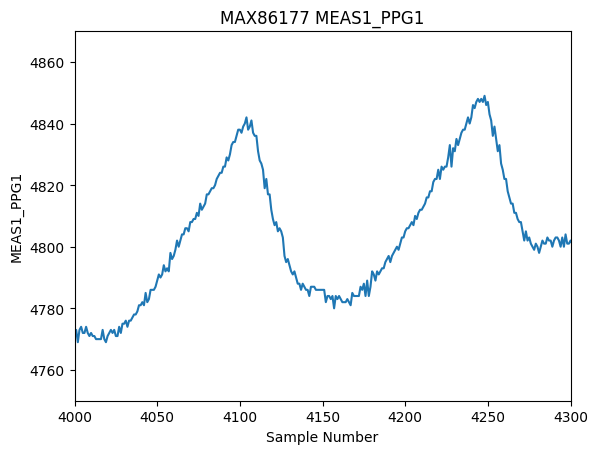

In [16]:
import matplotlib.pyplot as plt

# Plot the line plot
plt.plot(df['sampleNum'], df['MEAS1_PPG1'])
plt.title('MAX86177 MEAS1_PPG1')
plt.ylabel('MEAS1_PPG1')
plt.xlabel('Sample Number')

plt.xlim([4000, 4300])
plt.ylim([4750, 4870])
plt.show()

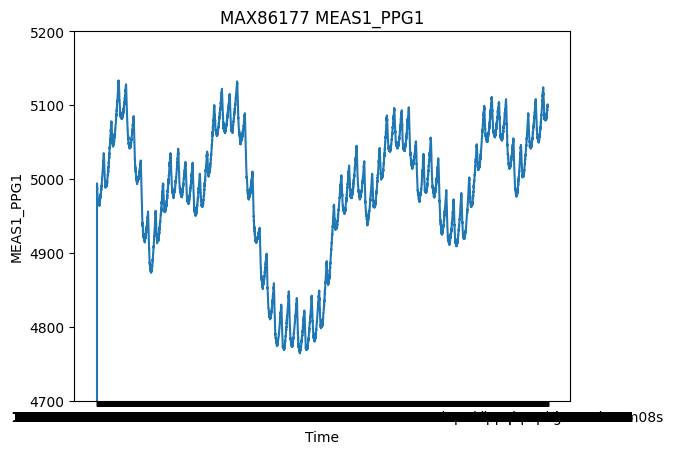

In [17]:
# Creat a line plot of MEAS1_PPG1 against the timestamp

plt.plot(df['timestamp'], df['MEAS1_PPG1'])
plt.title('MAX86177 MEAS1_PPG1')
plt.ylabel('MEAS1_PPG1')
plt.xlabel('Time')
# x-axis is in nanoseconds, so divide by 10^9 to get seconds
plt.ylim([4700, 5200])

plt.show()

In [12]:
int(df['timestamp'])

TypeError: cannot convert the series to <class 'int'>

In [18]:
# check is all the values in the timestamp column are integers
print(df['timestamp'].apply(lambda x: isinstance(x, int)).all())

# print values in the timestamp column that are not integers
print(df['timestamp'][~df['timestamp'].apply(lambda x: isinstance(x, int))])

False
0                 1690927089895.778076
1                 1690927089903.555908
2                 1690927089911.333984
3                 1690927089919.111816
4                 1690927089926.889893
                     ...              
8617                         stop time
8618    elapsed capture time: 0h01m08s
8619            missed packet count: 0
8620            incorrect tag count: 1
8621              vcpp parser 20220803
Name: timestamp, Length: 8622, dtype: object


In [ ]:
#

In [19]:
# Convert the timestamp from nanoseconds to seconds
df['timestamp_seconds'] = df['timestamp'] / 10**9

# Plot the line plot
plt.plot(df['timestamp_seconds'], df['MEAS1_PPG1'])
plt.title('MAX86177 MEAS1_PPG1')
plt.ylabel('MEAS1_PPG1')
plt.xlabel('Time (s)')
plt.ylim([4700, 5200])
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
#TO DO
# Normalize the 'time_ms' column
df['normalized_time'] = df['timestamp'] - min_value


# Apply a high-pass filter to the PPG signal to remove slow-wave drift

# Waveform visualization

# Waveform analysis

# Look at PPG signal quality with vital_sql
# https://github.com/meta00/vital_sqi




In [ ]:
# Normalize time values
# Define signal charcteristics (sample rate)

import pandas as pd

# Sample data
data = df['timestamp']
data.dtypes



In [ ]:
# Create a DataFrame
df = pd.DataFrame(data)
df['timestamp'] = pd.to_numeric(df['timestamp'], downcast='float')


In [ ]:
# Find the minimum value in the 'time_ms' column
min_value = df['timestamp'].min()

print(min_value)

1690927089895.778076


In [ ]:
df['normalized_time'] = df['timestamp']

df.head()

,timestamp,normalized_time
0,1690927089895.778076,1690927089895.778076
1,1690927089903.555908,1690927089903.555908
2,1690927089911.333984,1690927089911.333984
3,1690927089919.111816,1690927089919.111816
4,1690927089926.889893,1690927089926.889893


In [ ]:
import pandas as pd

# Sample data with non-integer millisecond values
data = {'time_ms': [100.25, 200.5, 300.75, 400.0, 500.25]}

# Create a DataFrame
df = pd.DataFrame(data)

# Find the minimum value in the 'time_ms' column
min_value = df['time_ms'].min()

# Normalize the 'time_ms' column
df['normalized_time'] = df['time_ms'] - min_value

print(df)